# GRIP:The Sparks Foundation

# Data science and Bussiness Analytics Intern

# Prepared By: Utkarsh Parekh

# Task 6: Prediction using Decision Tree Algorithm

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
Data=pd.read_csv("Iris.csv")
Data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


# Drop Id Columns

In [3]:
Data=Data.drop(["Id"],axis="columns")
Data

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [64]:
Data.head(6)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0
5,6,5.4,3.9,1.7,0.4,0


In [18]:
Data.tail()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2
149,5.9,3.0,5.1,1.8,2


In [5]:
Data.shape

(150, 5)

In [16]:
Data.Species.unique()

array([0, 1, 2], dtype=int64)

# Data Visulization

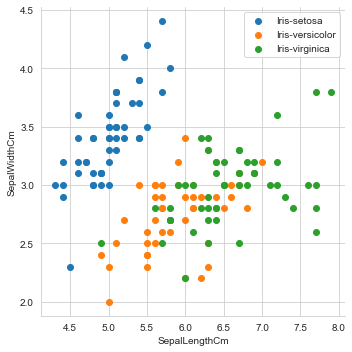

In [4]:
import seaborn as sns
sns.set_style("whitegrid");
sns.FacetGrid(Data,hue="Species",size=5)\
.map(plt.scatter,"SepalLengthCm","SepalWidthCm")
plt.legend()

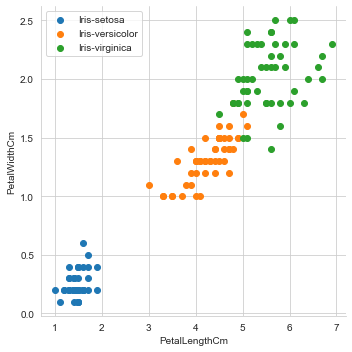

In [9]:
import seaborn as sns
sns.set_style("whitegrid");
sns.FacetGrid(Data,hue="Species",size=5)\
.map(plt.scatter,"PetalLengthCm","PetalWidthCm")
plt.legend()

In [8]:
Data.isnull().any()

SepalLengthCm    False
SepalWidthCm     False
PetalLengthCm    False
PetalWidthCm     False
Species          False
dtype: bool

 // for Decision tree classification we have to convert "species" column into numerical form so we will use LabelEncoding methode//

# Converting the species name into Number

In [33]:
from sklearn.preprocessing import LabelEncoder
Le_Species=LabelEncoder()

In [34]:
Data["Species"]=Le_Species.fit_transform(Data["Species"])
Data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,2
146,147,6.3,2.5,5.0,1.9,2
147,148,6.5,3.0,5.2,2.0,2
148,149,6.2,3.4,5.4,2.3,2


// Here Iris-setosa=0,Iris-versicolor=1,Iris-Virginica=2

In [35]:
x=Data.drop(["Species"],axis="columns")
x=x.values
x

array([[1.00e+00, 5.10e+00, 3.50e+00, 1.40e+00, 2.00e-01],
       [2.00e+00, 4.90e+00, 3.00e+00, 1.40e+00, 2.00e-01],
       [3.00e+00, 4.70e+00, 3.20e+00, 1.30e+00, 2.00e-01],
       [4.00e+00, 4.60e+00, 3.10e+00, 1.50e+00, 2.00e-01],
       [5.00e+00, 5.00e+00, 3.60e+00, 1.40e+00, 2.00e-01],
       [6.00e+00, 5.40e+00, 3.90e+00, 1.70e+00, 4.00e-01],
       [7.00e+00, 4.60e+00, 3.40e+00, 1.40e+00, 3.00e-01],
       [8.00e+00, 5.00e+00, 3.40e+00, 1.50e+00, 2.00e-01],
       [9.00e+00, 4.40e+00, 2.90e+00, 1.40e+00, 2.00e-01],
       [1.00e+01, 4.90e+00, 3.10e+00, 1.50e+00, 1.00e-01],
       [1.10e+01, 5.40e+00, 3.70e+00, 1.50e+00, 2.00e-01],
       [1.20e+01, 4.80e+00, 3.40e+00, 1.60e+00, 2.00e-01],
       [1.30e+01, 4.80e+00, 3.00e+00, 1.40e+00, 1.00e-01],
       [1.40e+01, 4.30e+00, 3.00e+00, 1.10e+00, 1.00e-01],
       [1.50e+01, 5.80e+00, 4.00e+00, 1.20e+00, 2.00e-01],
       [1.60e+01, 5.70e+00, 4.40e+00, 1.50e+00, 4.00e-01],
       [1.70e+01, 5.40e+00, 3.90e+00, 1.30e+00, 4.00e-01

In [44]:
y=Data.iloc[:,-1]
y.values

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [45]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0)

# Decision Tree

In [46]:
from sklearn import tree
model = tree.DecisionTreeClassifier()

In [47]:
model.fit(x,y)

DecisionTreeClassifier()

In [48]:
model.score(x,y)

1.0

In [63]:
x_test

array([[1.15e+02, 5.80e+00, 2.80e+00, 5.10e+00, 2.40e+00],
       [6.30e+01, 6.00e+00, 2.20e+00, 4.00e+00, 1.00e+00],
       [3.40e+01, 5.50e+00, 4.20e+00, 1.40e+00, 2.00e-01],
       [1.08e+02, 7.30e+00, 2.90e+00, 6.30e+00, 1.80e+00],
       [8.00e+00, 5.00e+00, 3.40e+00, 1.50e+00, 2.00e-01],
       [1.01e+02, 6.30e+00, 3.30e+00, 6.00e+00, 2.50e+00],
       [4.10e+01, 5.00e+00, 3.50e+00, 1.30e+00, 3.00e-01],
       [8.70e+01, 6.70e+00, 3.10e+00, 4.70e+00, 1.50e+00],
       [7.70e+01, 6.80e+00, 2.80e+00, 4.80e+00, 1.40e+00],
       [7.20e+01, 6.10e+00, 2.80e+00, 4.00e+00, 1.30e+00],
       [1.35e+02, 6.10e+00, 2.60e+00, 5.60e+00, 1.40e+00],
       [5.20e+01, 6.40e+00, 3.20e+00, 4.50e+00, 1.50e+00],
       [7.40e+01, 6.10e+00, 2.80e+00, 4.70e+00, 1.20e+00],
       [5.50e+01, 6.50e+00, 2.80e+00, 4.60e+00, 1.50e+00],
       [6.40e+01, 6.10e+00, 2.90e+00, 4.70e+00, 1.40e+00],
       [3.80e+01, 4.90e+00, 3.10e+00, 1.50e+00, 1.00e-01],
       [7.90e+01, 6.00e+00, 2.90e+00, 4.50e+00, 1.50e+00

In [56]:
pred=model.predict(x_test)
pred

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 1])

[Text(223.2, 362.4, 'X[3] <= 2.45\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]'),
 Text(111.6, 217.44, 'gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]'),
 Text(334.79999999999995, 217.44, 'X[0] <= 100.5\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]'),
 Text(223.2, 72.47999999999996, 'gini = 0.0\nsamples = 50\nvalue = [0, 50, 0]'),
 Text(446.4, 72.47999999999996, 'gini = 0.0\nsamples = 50\nvalue = [0, 0, 50]')]

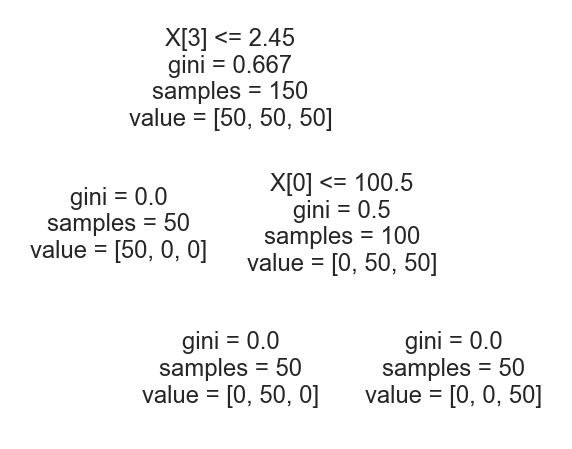

In [65]:
plt.figure(figsize=(10,8))
tree.plot_tree(model,filled=False)